# Очистка данных. Практическая работа

## Цель практической работы

- Научиться выполнять очистку и подготовку данных для их дальнейшего использования в задаче машинного обучения.

## Что нужно сделать

- Загрузить данные в ноутбук.
- Провести разведочный анализ данных.
- Разделить данные на обучающую и тестовую выборки.
- Выполнить очистку и подготовку данных.

## Что оценивается 

1. Выполнены все этапы задания.
1. Не допущены утечки данных.

## Формат сдачи

Выполните предложенные задания: впишите свой код в ячейки после комментария `### YOUR CODE HERE ###` и сохраните изменения, используя опцию *Save and Checkpoint* из вкладки меню *File* или кнопку *Save and Checkpoint* на панели инструментов. Итоговый файл в формате `.ipynb` (файл Jupyter Notebook) загрузите в личный кабинет и отправьте на проверку.

## Задача
Имеется набор данных покупателей супермаркета. Проведите анализ и очистку этих данных.

### Описание данных

Дан файл Mall_Customers.csv, содержащий следующие данные по покупателям сети супермаркетов:
- CustomerID — идентификатор покупателя.
- Genre – пол покупателя.
- Age – возраст покупателя.
- Annual Income (k\$) – годовой доход покупателя, тысяч $.
- Spending Score (1–100) – рейтинг покупателя, целевая переменная.

In [378]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder, StandardScaler

### Задание 1

Загрузите данные из файла `Mall_Customers.csv` в ноутбук и выведите первые пять строк на экран.

In [381]:
### YOUR CODE HERE ###
df = pd.read_csv("Mall_Customers.csv", index_col="CustomerID")

In [383]:
df

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19.0,15.0,39
2,Male,NaN,NaN,81
3,Female,NaN,16.0,6
4,Female,23.0,16.0,77
5,Female,31.0,17.0,40
...,...,...,...,...
196,Female,35.0,120.0,79
197,Female,45.0,126.0,28
198,Male,32.0,126.0,74


### Задание 2

Проведите разведочный анализ загруженных данных. Обязательные атрибуты для анализа:
- количество пропусков в каждом признаке;
- распределения признаков;
- возможные выбросы или аномалии.

Анализ дополнительных атрибутов и свойств данных приветствуется. Используйте средства визуализации там, где это необходимо.

По результатам анализа сделайте выводы о свойствах отдельных признаков и качестве данных в целом.

In [386]:
df.isna().sum()

Genre                     19
Age                       20
Annual Income (k$)        20
Spending Score (1-100)     0
dtype: int64

In [388]:
df.isna().sum() / df.shape[0]

Genre                     0.095
Age                       0.100
Annual Income (k$)        0.100
Spending Score (1-100)    0.000
dtype: float64

In [390]:
df[df.isna().sum(axis=1) >= 2]

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
2,Male,NaN,NaN,81
47,Female,NaN,NaN,55
55,NaN,50.0,NaN,45
107,NaN,NaN,63.0,50
124,NaN,39.0,NaN,91


In [392]:
numeric_features = df.select_dtypes(include=["int", "float"]).columns
numeric_features

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

Histogram for Age


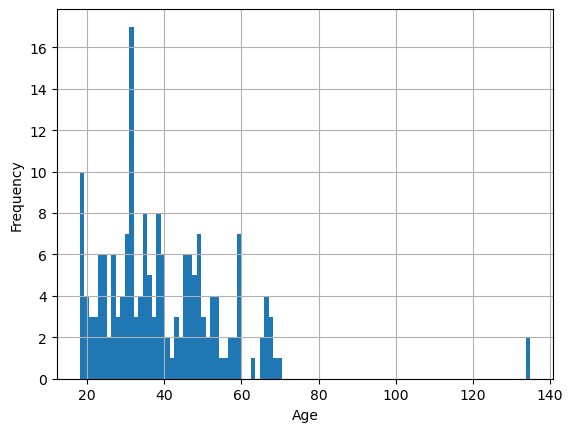

Histogram for Annual Income (k$)


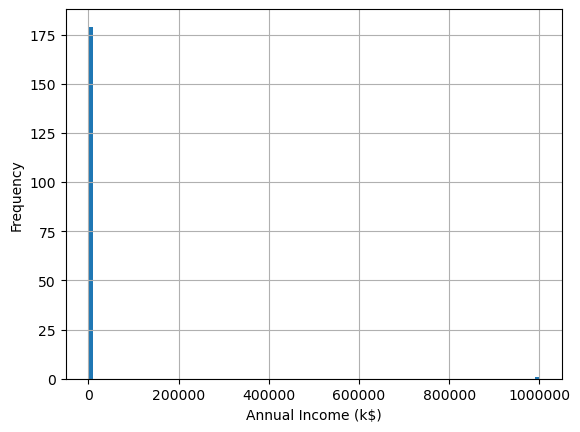

Histogram for Spending Score (1-100)


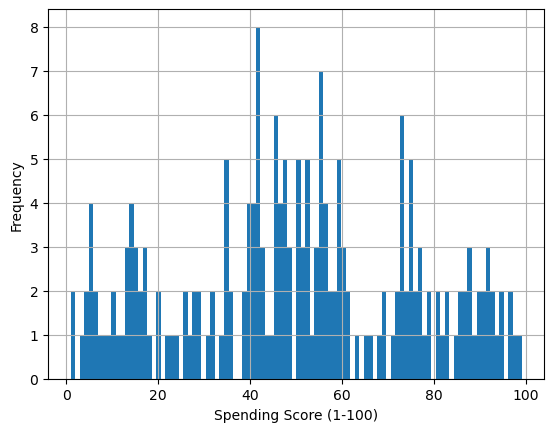

In [394]:
for col in numeric_features:
    print(f"Histogram for {col}")
    df[col].hist(bins=100) 
    plt.xlabel(col)
    plt.ylabel("Frequency")

    plt.ticklabel_format(style='plain', axis='both')
    plt.show()

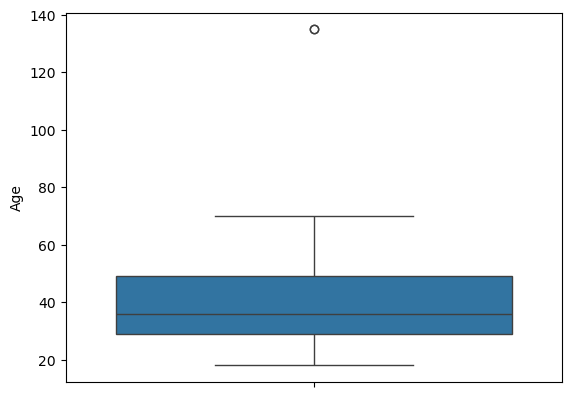

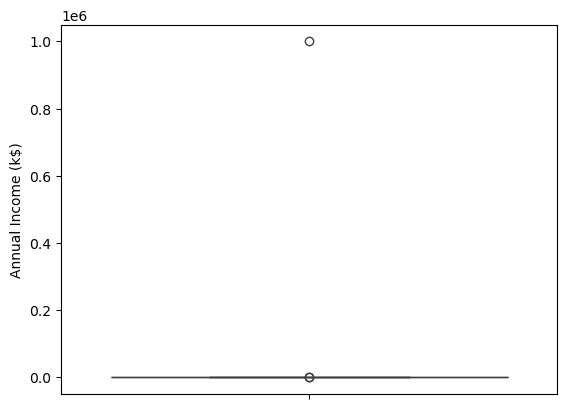

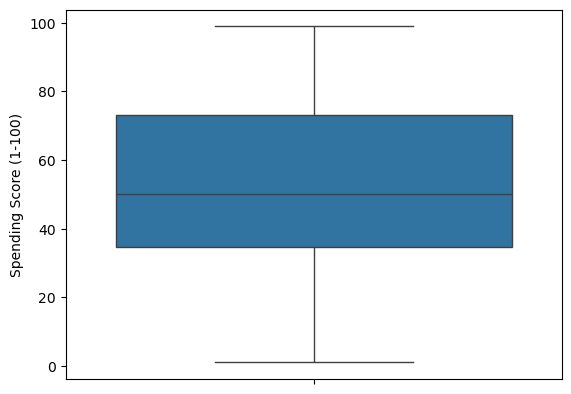

In [395]:
for col in numeric_features:
    sns.boxplot(data=df, y=col)
    plt.show()

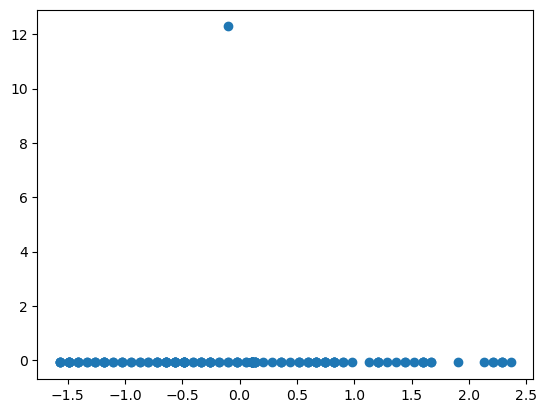

In [396]:
plt.scatter(X_train["Age"], X_train["Annual Income (k$)"])
plt.show()

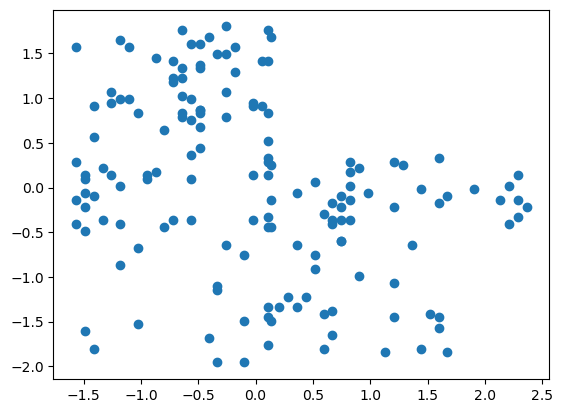

In [397]:
plt.scatter(X_train["Age"], X_train["Spending Score (1-100)"])
plt.show()

Строки с большим количеством пропусков (≥2), не встречаются. 

Для Age Распределение неравномерное. А для Spending Score (1–100) Распределение близко к равномерному.

По boxplot можно заметить единичные значения, которые лежат чуть дальше усов, но они не являются реальными ошибками, а отражают разнообразие реальных клиентов.

### Задание 3

Разделите данные на обучающую и тестовую выборки в пропорции 80:20. Здесь и далее используйте random_state = 1.

In [401]:
### YOUR CODE HERE ###
X_train, X_test = train_test_split(df, test_size=0.2, random_state=1)

### Задание 4

Заполните пропуски в признаках в обучающей выборке с использованием инструментов sklearn. Для каждого признака выберите и аргументируйте стратегию заполнения пропусков.

In [406]:
X_train.shape

(160, 4)

In [407]:
X_train = X_train[X_train.isna().sum(axis=1) < 2] # Там где в строке больше 2 пропусков удаляем, тк таких строк мало. 

In [410]:
X_train.isna().sum()

Genre                     12
Age                       12
Annual Income (k$)        14
Spending Score (1-100)     0
dtype: int64

In [412]:
df[(df['Age'] < 20) & (df['Annual Income (k$)'].isna())]

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
139,Male,19.0,NaN,10


In [414]:
imp_const_0 = SimpleImputer(strategy="constant", fill_value=0)
zero_col = "Annual Income (k$)"

X_train[[zero_col]] = imp_const_0.fit_transform(X_train[[zero_col]])
X_train.head()

# доход заполняем 0 тк предполагаем, что он просто неизвестен

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
109,Male,68.0,63.0,43
108,Male,54.0,63.0,46
190,Female,36.0,103.0,85
15,Male,37.0,20.0,13
57,NaN,51.0,44.0,50


In [416]:
X_train[[zero_col]].isna().sum()

Annual Income (k$)    0
dtype: int64

In [418]:
imp_knn = KNNImputer(n_neighbors=3)

nums_col = ["Age"]

X_train[nums_col] = imp_knn.fit_transform(X_train[nums_col])

# для age используем knn соседей, чтобы ближе подобрать нужные значения

In [420]:
X_train[nums_col].isna().sum()

Age    0
dtype: int64

### Задание 5

Найдите выбросы в признаках обучающей выборки. Замените выбросы, если таковые имеются, и аргументируйте выбор метода поиска выбросов.


In [423]:
X_train[X_train["Age"] > 70]  ## Не может быть возраст 135), удаляем тк их мало, менять смысла нет

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
7,NaN,135.0,18.0,6
9,Male,135.0,19.0,3


In [425]:
X_train = X_train[X_train["Age"] < 70]

In [427]:
isf = IsolationForest(n_estimators=100, contamination=0.005, random_state=1)
y_pred = isf.fit_predict(X_train[["Age", "Spending Score (1-100)"]])

In [428]:
df_1 = X_train.copy()
df_1["age_spending-score_outlier"] = y_pred

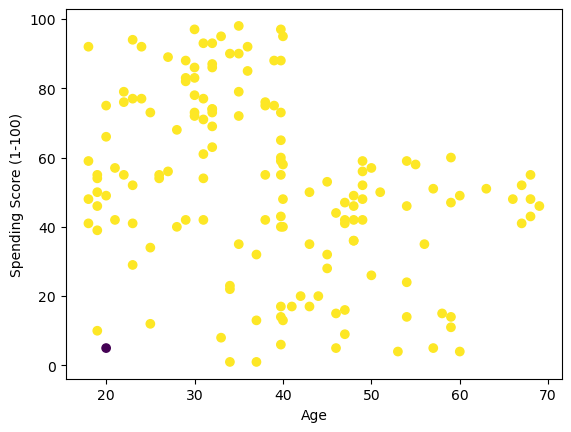

In [431]:
plt.scatter(df_1["Age"], df_1["Spending Score (1-100)"], c=df_1["age_spending-score_outlier"])
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.show()

In [433]:
X_train["Genre"].unique()

array(['Male', 'Female', nan, 'Feemale'], dtype=object)

In [435]:
X_train[X_train["Genre"] == "Feemale"]

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
66,Feemale,18.0,48.0,59


In [437]:
X_train['Genre'] = X_train['Genre'].replace('Feemale', 'Female')

In [439]:
X_train["Genre"].unique()

array(['Male', 'Female', nan], dtype=object)

### Задание 6

Нормализуйте численные признаки. Аргументируйте выбор стратегии нормализации для каждого признака.


In [442]:
scaler = StandardScaler() # использовал универсальный StandardScaler. Тк разный диапазон признаков;
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])

In [444]:
X_train

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
109,Male,2.288799,-0.081280,-0.329777
108,Male,1.209534,-0.081280,-0.213565
190,Female,-0.178092,-0.080785,1.297192
15,Male,-0.101002,-0.081811,-1.491898
57,NaN,0.978263,-0.081515,-0.058616
...,...,...,...,...
134,Female,-0.563544,-0.081168,0.754869
138,Male,-0.486454,-0.081156,0.832343
73,Female,1.672076,-0.081440,-0.097353


### Задание 7

Закодируйте категориальные признаки в обучающей выборке. Аргументируйте выбор способа кодирования.

In [447]:
le = LabelEncoder() # использую label для кодирования двех переменных male female в 1 и 0 соотв.
X_train["Genre"] = le.fit_transform(X_train["Genre"])

In [481]:
X_train[["Genre"]] = imp_knn.fit_transform(X_train[["Genre"]])

In [460]:
X_train["Genre"].isna().sum()

0

In [462]:
scaler_genre = StandardScaler()
X_train[["Genre"]] = scaler_genre.fit_transform(X_train[["Genre"]])

In [464]:
X_train

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
109,0.694929,2.288799,-0.081280,-0.329777
108,0.694929,1.209534,-0.081280,-0.213565
190,-0.905514,-0.178092,-0.080785,1.297192
15,0.694929,-0.101002,-0.081811,-1.491898
57,2.295373,0.978263,-0.081515,-0.058616
...,...,...,...,...
134,-0.905514,-0.563544,-0.081168,0.754869
138,0.694929,-0.486454,-0.081156,0.832343
73,-0.905514,1.672076,-0.081440,-0.097353


### Задание 8
Проведите очистку и подготовку тестовых данных. Используйте препроцессоры и другие инструменты, которые вы уже использовали при подготовке обучающей выборки, без их дополнительной настройки.

In [471]:
X_test[[zero_col]] = imp_const_0.fit_transform(X_test[[zero_col]])
X_test.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
59,Female,27.0,46.0,51
41,Female,65.0,38.0,35
35,Feemale,49.0,33.0,14
103,Male,67.0,62.0,59
185,Female,41.0,99.0,39


In [473]:
X_test["Annual Income (k$)"].isna().sum()

0

In [475]:
X_test[nums_col] = imp_knn.fit_transform(X_test[nums_col])

In [479]:
X_test["Age"].isna().sum()

0

In [483]:
le = LabelEncoder()
X_test["Genre"] = le.fit_transform(X_test["Genre"])

imp_knn = KNNImputer(n_neighbors=3)

X_test[["Genre"]] = imp_knn.fit_transform(X_test[["Genre"]])